Project: Investigating Fandango Movie Ratings

The goal of the project is to analyze movie ratings and confirm or deny that data is being manipulated.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import percentileofscore
import numpy as np
import seaborn as sns

In [2]:
fandango = pd.read_csv('fandango_score_comparison.csv')
movie_ratings= pd.read_csv('movie_ratings_16_17.csv')

In [7]:
fandango2=fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [4]:
movie_ratings2=movie_ratings[['movie', 'year', 'fandango']]

In [5]:
fandango[fandango['Fandango_votes']>30]['Fandango_votes'].value_counts(bins=10)

(0.188, 3516.1]       102
(3516.1, 6997.2]       19
(6997.2, 10478.3]      12
(13959.4, 17440.5]      5
(31364.9, 34846.0]      4
(10478.3, 13959.4]      4
(27883.8, 31364.9]      0
(24402.7, 27883.8]      0
(20921.6, 24402.7]      0
(17440.5, 20921.6]      0
Name: Fandango_votes, dtype: int64

In [8]:
fandango2.iloc[0:4,:]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5


In [14]:
fandango2['FILM'].str.extract(r'\((201[56])\)',expand=False).value_counts()

2015    129
Name: FILM, dtype: int64

In [19]:
sum(movie_ratings2['year']==2016)

191

In [22]:
movie_ratings2['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [24]:
movies_2016 = movie_ratings2[movie_ratings['year']==2016]

In [27]:

fandango2['movies_2015'] = fandango2['FILM'].str.extract(r'\((2015)\)',expand=False)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
fandango2['movies_2015'].count()

129

In [31]:
movies_2015 = fandango2[fandango2['movies_2015']=='2015']

In [32]:
movies_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,movies_2015
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [33]:
movies_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


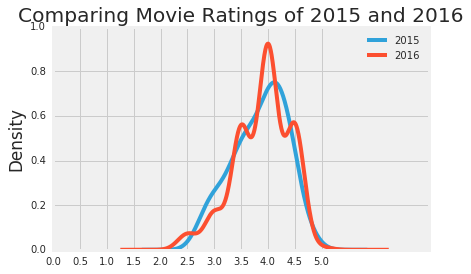

In [38]:
movies_2015['Fandango_Ratingvalue'].plot.kde(x=range(6),label='2015',legend=True)
movies_2016['fandango'].plot.kde(x=range(6),label='2016',legend=True)
plt.title('Comparing Movie Ratings of 2015 and 2016')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.style.use('fivethirtyeight')
plt.show()

The distributions are left-skewed.
The two shapes are somewhat similar but are clearly different.
Movies in 2016 are rated higher compared to 2015.

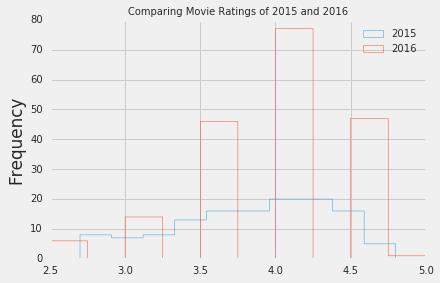

In [43]:
movies_2015['Fandango_Ratingvalue'].plot.hist(histtype='step',label='2015',legend=True)
movies_2016['fandango'].plot.hist(histtype='step',label='2016',legend=True)
plt.title('Comparing Movie Ratings of 2015 and 2016',size=10)

From the frequency distribution there is clearly a difference between movie ratings in from both years.

In [50]:
print(movies_2016['fandango'].mean())
print(movies_2016['fandango'].mode())
print(movies_2016['fandango'].median())

3.887434554973822
0    4.0
dtype: float64
4.0


In [49]:
print(movies_2015['Fandango_Ratingvalue'].mean())
print(movies_2015['Fandango_Ratingvalue'].mode())
print(movies_2015['Fandango_Ratingvalue'].median())

3.8465116279069766
0    4.1
dtype: float64
3.9


Higher mean and median in movie ratings from the year 2016, which confrims our initial conclusion from analysis using the frequency tables and density graphs; there is a sudden change in the distribution of ratings after 2015. That of 2015 is more uniformly distributed while that of 2016 looks strange and doctored.